<a href="https://colab.research.google.com/github/natalie-ava/Diabetes-BoneFracture-EDA/blob/main/BoneFractureDataLab_Natalie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Analysis of Diabetes and Fracture Prevalences</h2>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [26]:
!git clone https://github.com/m-rafiul-islam/uiw-ds

Cloning into 'uiw-ds'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 61 (delta 25), reused 3 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 19.58 MiB | 10.00 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [27]:
import os
prompt = '!git clone https://github.com/m-rafiul-islam/uiw-ds'
os.system(prompt)

32512

In [28]:
import pandas as pd
file_path = '/content/uiw-ds/Copy of WM_SAT_Emp_Population_Output_UIW_20221003 (003).xlsx'
dfs = pd.read_excel(file_path,sheet_name = None)
dfs

{'Target_population':                                     anon_id member_gender  member_age  \
 0      F7D31775-C766-437C-8F20-5873168374F3             M          75   
 1      5E33C22D-198D-4771-A456-A711FAB53E15             M          81   
 2      5F430FF2-346F-434A-8A45-04D5795F0EEC             M          79   
 3      C5984BA6-37B2-4315-A52B-3C28E8DD34CA             M          76   
 4      4CEB8191-1B88-4FDB-A0BC-05AD96A125BA             M          86   
 ...                                     ...           ...         ...   
 26505  27CAD9DA-FED2-4F7D-B265-2D6E52209DE4             M          61   
 26506  39DC8F1F-32B9-41BC-885E-6E29F1C79BB8             M          78   
 26507  2B3165D7-5305-469D-8DD2-2257D94CB16F             M          66   
 26508  99D097C8-3A95-4BBF-9CC2-8793895710B6             M          68   
 26509  8DDCE1E6-B366-44A8-9C7F-C2B4279A0EAB             M          72   
 
                member_race        Member_Ethnicity       market  
 0                 His

In [29]:
dfs.keys()

dict_keys(['Target_population', 'Diabetic_Pop', 'Fracture_pop', 'Smoking_pop', 'ETOH_pop', 'Gluc_lab_pop', 'A1c_lab_pop', 'Vit_D_Pop', 'Alk_Phos_pop', 'testost_pop', 'calcium_pop', 'glom_filt_pop', 'Insulin_pop', 'Statin_pop', 'Glucocorticoid_pop', 'DEXA_pop'])

In [30]:
Target_population_df = dfs['Target_population']
Target_population_df

,anon_id,member_gender,member_age,member_race,Member_Ethnicity,market
0,F7D31775-C766-437C-8F20-5873168374F3,M,75,Hispanic,Not Hispanic or Latino,San Antonio
1,5E33C22D-198D-4771-A456-A711FAB53E15,M,81,NaN,NaN,San Antonio
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,M,79,Hispanic,Hispanic or Latino,San Antonio
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,M,76,White,Not Hispanic or Latino,San Antonio
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,M,86,NaN,NaN,San Antonio
...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,M,61,Hispanic,Hispanic or Latino,San Antonio
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,M,78,Hispanic,Hispanic or Latino,San Antonio
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,M,66,Declined to Specify,Mexican,San Antonio
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,M,68,NaN,NaN,San Antonio


In [ ]:
Target_population_df.columns

Index(['anon_id', 'member_gender', 'member_age', 'member_race',
       'Member_Ethnicity', 'market'],
      dtype='object')

In [ ]:
# all members are male -- we can drop this column
# all members are from SA -- we can drop this column as well
Target_population_df['member_gender'].value_counts()

,count
member_gender,
M,26510


In [ ]:
# each member id is unique
Target_population_df['anon_id'].value_counts().head()

,count
anon_id,
8DDCE1E6-B366-44A8-9C7F-C2B4279A0EAB,1
F7D31775-C766-437C-8F20-5873168374F3,1
5E33C22D-198D-4771-A456-A711FAB53E15,1
5F430FF2-346F-434A-8A45-04D5795F0EEC,1
C5984BA6-37B2-4315-A52B-3C28E8DD34CA,1


In [ ]:
Target_population_df['member_race'].unique()

array(['Hispanic', nan, 'White', 'Black or African American',
       'Other Race', 'Declined to Specify',
       'American Indian or Alaska Native', 'Unreported/Refused to Report',
       'Black', 'Asian', 'African American', 'Mexican American Indian',
       'Native Hawaiian or Other Pacific Islander', 'English', 'European',
       'Declined To Specify', 'American Indian', 'Other Pacific Islander',
       'white', 'White Earth', 'Spanish American Indian', 'Vietnamese',
       'Caucasian'], dtype=object)

In [ ]:
# There are 22 different documented races
Target_population_df['member_race'].nunique()

22

In [ ]:
Target_population_df['member_race'].value_counts()

,count
member_race,
White,7727
Hispanic,7423
Other Race,829
Unreported/Refused to Report,791
Declined to Specify,688
Black or African American,598
Asian,124
African American,21
American Indian or Alaska Native,17


In [ ]:
#combine repeated values

In [ ]:
Target_population_df['Member_Ethnicity'].value_counts()

,count
Member_Ethnicity,
Hispanic or Latino,9580
Not Hispanic or Latino,6832
Refused to Report,1177
Declined to Specify,591
Mexican,12
Mexican American,5
Latin American,1
Puerto Rican,1
Central American,1


In [ ]:
#combine 'Refused to Report' and 'Declined to Specify'

In [31]:
Target_population_df.drop(columns=['member_gender','market'])

,anon_id,member_age,member_race,Member_Ethnicity
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN
...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN


In [32]:
Target_population_df['Member_Ethnicity'].describe()

,Member_Ethnicity
count,18200
unique,9
top,Hispanic or Latino
freq,9580


In [ ]:
Target_population_df['member_age'].mean()

np.float64(72.25877027536778)

In [ ]:
Target_population_df['member_age'].min()

60

In [ ]:
dfs.keys()

dict_keys(['Target_population', 'Diabetic_Pop', 'Fracture_pop', 'Smoking_pop', 'ETOH_pop', 'Gluc_lab_pop', 'A1c_lab_pop', 'Vit_D_Pop', 'Alk_Phos_pop', 'testost_pop', 'calcium_pop', 'glom_filt_pop', 'Insulin_pop', 'Statin_pop', 'Glucocorticoid_pop', 'DEXA_pop'])

In [33]:
Diabetic_Pop_df = dfs['Diabetic_Pop']
Diabetic_Pop_df

,anon_id,earliest_diabetes_dx
0,F7D31775-C766-437C-8F20-5873168374F3,2012-02-16
1,5F430FF2-346F-434A-8A45-04D5795F0EEC,2016-02-05
2,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,2012-02-13
3,262B650A-A9A4-4757-BE2C-F7D1547B6DF8,2012-04-09
4,B82D7718-139E-41AB-90CB-A04DE970E3C7,2012-01-09
...,...,...
8677,A8D5773B-60A2-4FC9-9952-37C0278D0641,2016-08-24
8678,40283B2F-9783-4C8C-8B4E-078969CA6709,2015-03-27
8679,810FC5BE-CB80-46F6-B17F-BE00F34466F0,2015-03-12
8680,E2941D2F-920A-422F-B3C3-DC8AC89990E9,2018-12-06


In [34]:
raw_url = 'https://raw.githubusercontent.com/m-rafiul-islam/uiw-ds/main/diabetic_data_short_status4.csv'
df_combined_short = pd.read_csv(raw_url)
df_combined_short

,Unnamed: 0,anon_id,member_gender,member_age,member_race,Member_Ethnicity,earliest_diabetes_dx,latest_frac_dx,frac_dx,frac_descr,on_insulins,diabetic_status,fracture_status
0,0,F7D31775-C766-437C-8F20-5873168374F3,M,75,Hispanic,Not Hispanic or Latino,2012-02-16,NaN,NaN,NaN,no,True,False
1,1,5E33C22D-198D-4771-A456-A711FAB53E15,M,81,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False
2,2,5F430FF2-346F-434A-8A45-04D5795F0EEC,M,79,Hispanic,Hispanic or Latino,2016-02-05,NaN,NaN,NaN,yes,True,False
3,3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,M,76,White,Not Hispanic or Latino,2012-02-13,NaN,NaN,NaN,no,True,False
4,4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,M,86,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,M,61,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,no,False,False
26506,26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,M,78,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,yes,False,False
26507,26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,M,66,Declined to Specify,Mexican,NaN,NaN,NaN,NaN,no,False,False
26508,26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,M,68,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False


## Clean Dataset


In [35]:
df_merged = pd.merge(left=df_combined_short, right=dfs['Fracture_pop'], on= 'anon_id', how= 'outer')
df_merged

,Unnamed: 0,anon_id,member_gender,member_age,member_race,Member_Ethnicity,earliest_diabetes_dx,latest_frac_dx_x,frac_dx_x,frac_descr_x,on_insulins,diabetic_status,fracture_status,latest_frac_dx_y,frac_dx_y,frac_descr_y
0,6934,00045474-BAB3-4928-BF89-6072DBFB347C,M,75,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
1,21274,000488B9-0652-4E98-80CF-D80546D04C5A,M,78,Hispanic,Hispanic or Latino,2013-08-26,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN
2,22491,000D68C5-BF59-4C55-B29D-194F7A5CC95E,M,60,NaN,NaN,2020-01-17,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN
3,14621,000F558C-8A82-4835-9430-FC7B2828F3A2,M,88,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
4,21733,00101DC8-044B-4C11-BBF5-C7265AD26985,M,82,NaN,NaN,2012-02-16,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,20016,FFF99710-52C4-4D04-998B-2054CCAE968D,M,73,Unreported/Refused to Report,Refused to Report,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
26506,5012,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,M,75,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
26507,4491,FFFDD862-887B-4109-9841-7BC77ED0E164,M,64,Declined to Specify,Declined to Specify,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
26508,20410,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,M,62,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN


In [36]:
dfs.keys()
dfs['Fracture_pop']

,anon_id,latest_frac_dx,frac_dx,frac_descr
0,5F5063CE-686D-4A92-B0B8-5B2996221F38,2012-01-06,805.9,Open fracture of unspecified part of vertebral...
1,99123EA6-F708-41F8-BB9C-9F8458AC447C,2012-01-10,805.4,Closed fracture of lumbar vertebra without men...
2,4274D0F0-BAC3-44A8-9697-90E938CB4FDC,2012-01-13,820.8,Closed fracture of unspecified part of neck of...
3,21CE6E8E-787E-4091-95D4-3DD6C17751DD,2012-01-19,821.10,Open fracture of unspecified part of femur
4,127D5E0A-B489-46A7-BA35-45313899C339,2012-01-30,733.13,Pathologic fracture of vertebrae
...,...,...,...,...
1616,60AA80A4-44FD-4ABC-93ED-84BDB0F7BB01,2020-12-31,S52.502D,Unspecified fracture of the lower end of left ...
1617,D71708B6-C78C-422F-B1A1-1AA453E1E094,2020-12-31,S72.001A,Fracture of unspecified part of neck of right ...
1618,0D15AB20-57AC-4F4D-A54A-20587B0ABE3D,2020-12-31,M81.8,Other osteoporosis without current pathologica...
1619,88838264-0E86-4270-B25E-BDE1FAB8EEB5,2020-12-31,S92.011D,"Displaced fracture of body of right calcaneus,..."


In [37]:
#new columns
# dfs['new column']= dfs['old column'].notna()
# creates a true/false column based on the information from the old column

df_merged['diabetic_status']= df_merged['earliest_diabetes_dx'].notna()
df_merged

,Unnamed: 0,anon_id,member_gender,member_age,member_race,Member_Ethnicity,earliest_diabetes_dx,latest_frac_dx_x,frac_dx_x,frac_descr_x,on_insulins,diabetic_status,fracture_status,latest_frac_dx_y,frac_dx_y,frac_descr_y
0,6934,00045474-BAB3-4928-BF89-6072DBFB347C,M,75,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
1,21274,000488B9-0652-4E98-80CF-D80546D04C5A,M,78,Hispanic,Hispanic or Latino,2013-08-26,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN
2,22491,000D68C5-BF59-4C55-B29D-194F7A5CC95E,M,60,NaN,NaN,2020-01-17,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN
3,14621,000F558C-8A82-4835-9430-FC7B2828F3A2,M,88,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
4,21733,00101DC8-044B-4C11-BBF5-C7265AD26985,M,82,NaN,NaN,2012-02-16,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,20016,FFF99710-52C4-4D04-998B-2054CCAE968D,M,73,Unreported/Refused to Report,Refused to Report,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
26506,5012,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,M,75,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
26507,4491,FFFDD862-887B-4109-9841-7BC77ED0E164,M,64,Declined to Specify,Declined to Specify,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
26508,20410,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,M,62,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN


In [38]:
df_2 = pd.merge(left=df_merged, right=dfs['Smoking_pop'], on= 'anon_id', how= 'outer')
df_2

,Unnamed: 0,anon_id,member_gender,member_age,member_race,Member_Ethnicity,earliest_diabetes_dx,latest_frac_dx_x,frac_dx_x,frac_descr_x,on_insulins,diabetic_status,fracture_status,latest_frac_dx_y,frac_dx_y,frac_descr_y,most_recent_smoking_dx
0,6934,00045474-BAB3-4928-BF89-6072DBFB347C,M,75,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN
1,21274,000488B9-0652-4E98-80CF-D80546D04C5A,M,78,Hispanic,Hispanic or Latino,2013-08-26,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN,NaN
2,22491,000D68C5-BF59-4C55-B29D-194F7A5CC95E,M,60,NaN,NaN,2020-01-17,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN,2020-12-01
3,14621,000F558C-8A82-4835-9430-FC7B2828F3A2,M,88,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN
4,21733,00101DC8-044B-4C11-BBF5-C7265AD26985,M,82,NaN,NaN,2012-02-16,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,20016,FFF99710-52C4-4D04-998B-2054CCAE968D,M,73,Unreported/Refused to Report,Refused to Report,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN
26506,5012,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,M,75,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN
26507,4491,FFFDD862-887B-4109-9841-7BC77ED0E164,M,64,Declined to Specify,Declined to Specify,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN
26508,20410,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,M,62,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN


In [39]:
df_3 = pd.merge(left=df_2, right=dfs['A1c_lab_pop'], on= 'anon_id', how= 'outer')
df_3

,Unnamed: 0,anon_id,member_gender,member_age,member_race,Member_Ethnicity,earliest_diabetes_dx,latest_frac_dx_x,frac_dx_x,frac_descr_x,...,diabetic_status,fracture_status,latest_frac_dx_y,frac_dx_y,frac_descr_y,most_recent_smoking_dx,Lab_Result_Date,Lab_Result_Name,A1C_value,A1C_Measure
0,6934,00045474-BAB3-4928-BF89-6072DBFB347C,M,75,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,2020-11-17,HEMOGLOBIN A1c,5.7,% of total Hgb
1,21274,000488B9-0652-4E98-80CF-D80546D04C5A,M,78,Hispanic,Hispanic or Latino,2013-08-26,NaN,NaN,NaN,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22491,000D68C5-BF59-4C55-B29D-194F7A5CC95E,M,60,NaN,NaN,2020-01-17,NaN,NaN,NaN,...,True,False,NaN,NaN,NaN,2020-12-01,2020-01-14,Hemoglobin A1c,8.2,%
3,14621,000F558C-8A82-4835-9430-FC7B2828F3A2,M,88,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,2013-08-24,Hemoglobin A1c,5.6,%
4,21733,00101DC8-044B-4C11-BBF5-C7265AD26985,M,82,NaN,NaN,2012-02-16,NaN,NaN,NaN,...,True,False,NaN,NaN,NaN,NaN,2012-10-17,A1C-%HBA1C,6.8,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,20016,FFF99710-52C4-4D04-998B-2054CCAE968D,M,73,Unreported/Refused to Report,Refused to Report,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26506,5012,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,M,75,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,2014-03-11,Hemoglobin A1c,5.5,%
26507,4491,FFFDD862-887B-4109-9841-7BC77ED0E164,M,64,Declined to Specify,Declined to Specify,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26508,20410,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,M,62,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_4 = pd.merge(left=df_3, right=dfs['testost_pop'], on= 'anon_id', how= 'outer')
df_4

,Unnamed: 0,anon_id,member_gender,member_age,member_race,Member_Ethnicity,earliest_diabetes_dx,latest_frac_dx_x,frac_dx_x,frac_descr_x,...,frac_descr_y,most_recent_smoking_dx,Lab_Result_Date_x,Lab_Result_Name_x,A1C_value,A1C_Measure,Lab_Result_Date_y,Lab_Result_Name_y,testost_val,testost_meas
0,6934,00045474-BAB3-4928-BF89-6072DBFB347C,M,75,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2020-11-17,HEMOGLOBIN A1c,5.7,% of total Hgb,NaN,NaN,NaN,NaN
1,21274,000488B9-0652-4E98-80CF-D80546D04C5A,M,78,Hispanic,Hispanic or Latino,2013-08-26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22491,000D68C5-BF59-4C55-B29D-194F7A5CC95E,M,60,NaN,NaN,2020-01-17,NaN,NaN,NaN,...,NaN,2020-12-01,2020-01-14,Hemoglobin A1c,8.2,%,2020-02-01,"TESTOSTERONE, TOTAL, MS",546,ng/dL
3,14621,000F558C-8A82-4835-9430-FC7B2828F3A2,M,88,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,...,NaN,NaN,2013-08-24,Hemoglobin A1c,5.6,%,NaN,NaN,NaN,NaN
4,21733,00101DC8-044B-4C11-BBF5-C7265AD26985,M,82,NaN,NaN,2012-02-16,NaN,NaN,NaN,...,NaN,NaN,2012-10-17,A1C-%HBA1C,6.8,%,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,20016,FFF99710-52C4-4D04-998B-2054CCAE968D,M,73,Unreported/Refused to Report,Refused to Report,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26506,5012,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,M,75,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,...,NaN,NaN,2014-03-11,Hemoglobin A1c,5.5,%,NaN,NaN,NaN,NaN
26507,4491,FFFDD862-887B-4109-9841-7BC77ED0E164,M,64,Declined to Specify,Declined to Specify,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26508,20410,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,M,62,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_5 = df_4.drop(columns=['Unnamed: 0','member_gender','frac_dx_x','frac_descr_x','Lab_Result_Date_x','Lab_Result_Name_x','Lab_Result_Date_y','Lab_Result_Name_y','testost_meas','A1C_Measure'], axis = 1)
df_5

,anon_id,member_age,member_race,Member_Ethnicity,earliest_diabetes_dx,latest_frac_dx_x,on_insulins,diabetic_status,fracture_status,latest_frac_dx_y,frac_dx_y,frac_descr_y,most_recent_smoking_dx,A1C_value,testost_val
0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN,5.7,NaN
1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,2013-08-26,NaN,no,True,False,NaN,NaN,NaN,NaN,NaN,NaN
2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,2020-01-17,NaN,no,True,False,NaN,NaN,NaN,2020-12-01,8.2,546
3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN,5.6,NaN
4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,2012-02-16,NaN,no,True,False,NaN,NaN,NaN,NaN,6.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Unreported/Refused to Report,Refused to Report,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN,NaN,NaN
26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN,5.5,NaN
26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Declined to Specify,Declined to Specify,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN,NaN,NaN
26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_6 = df_5.drop(columns=['earliest_diabetes_dx','latest_frac_dx_x','latest_frac_dx_y','frac_dx_y','frac_descr_y'],axis=1)
df_6

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,fracture_status,most_recent_smoking_dx,A1C_value,testost_val
0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,False,NaN,5.7,NaN
1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,False,NaN,NaN,NaN
2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,False,2020-12-01,8.2,546
3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,False,NaN,5.6,NaN
4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,False,NaN,6.8,NaN
...,...,...,...,...,...,...,...,...,...,...
26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Unreported/Refused to Report,Refused to Report,no,False,False,NaN,NaN,NaN
26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,False,NaN,5.5,NaN
26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Declined to Specify,Declined to Specify,no,False,False,NaN,NaN,NaN
26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,False,NaN,NaN,NaN


In [43]:
df_6['smoker_status']= df_6['most_recent_smoking_dx'].notna()
df_6

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,fracture_status,most_recent_smoking_dx,A1C_value,testost_val,smoker_status
0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,False,NaN,5.7,NaN,False
1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,False,NaN,NaN,NaN,False
2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,False,2020-12-01,8.2,546,True
3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,False,NaN,5.6,NaN,False
4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,False,NaN,6.8,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Unreported/Refused to Report,Refused to Report,no,False,False,NaN,NaN,NaN,False
26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,False,NaN,5.5,NaN,False
26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Declined to Specify,Declined to Specify,no,False,False,NaN,NaN,NaN,False
26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,False,NaN,NaN,NaN,False


In [44]:
df_7 = df_6.drop(['most_recent_smoking_dx'],axis=1)
df_7

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,fracture_status,A1C_value,testost_val,smoker_status
0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,False,5.7,NaN,False
1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,False,NaN,NaN,False
2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,False,8.2,546,True
3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,False,5.6,NaN,False
4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,False,6.8,NaN,False
...,...,...,...,...,...,...,...,...,...,...
26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Unreported/Refused to Report,Refused to Report,no,False,False,NaN,NaN,False
26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,False,5.5,NaN,False
26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Declined to Specify,Declined to Specify,no,False,False,NaN,NaN,False
26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,False,NaN,NaN,False


In [45]:
df_8 = pd.merge(left=df_7, right=dfs['calcium_pop'], on= 'anon_id', how= 'outer')
df_8

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,fracture_status,A1C_value,testost_val,smoker_status,Lab_Result_Date,Lab_Result_Name,calcium_val,calcium_meas
0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,False,5.7,NaN,False,2020-11-16,Calcium (Mass/Vol),9.3,MG/DL
1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,False,NaN,NaN,False,2013-08-20,"Calcium, Serum",9.0,mg/dL
2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,False,8.2,546,True,2020-01-14,Calcium,9.7,mg/dL
3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,False,5.6,NaN,False,2012-06-15,"Calcium, Serum",9.4,mg/dL
4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,False,6.8,NaN,False,2012-10-19,Calcium,7.2,mg/dl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Unreported/Refused to Report,Refused to Report,no,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN
26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,False,5.5,NaN,False,2013-03-15,"Calcium, Serum",8.7,mg/dL
26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Declined to Specify,Declined to Specify,no,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN
26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,False,NaN,NaN,False,2020-08-26,CALCIUM,9.900000,mg/dL


In [46]:
df_9 = df_8.drop(columns=['Lab_Result_Date','Lab_Result_Name','calcium_meas'],axis=1)
df_9

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,fracture_status,A1C_value,testost_val,smoker_status,calcium_val
0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,False,5.7,NaN,False,9.3
1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,False,NaN,NaN,False,9.0
2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,False,8.2,546,True,9.7
3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,False,5.6,NaN,False,9.4
4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,False,6.8,NaN,False,7.2
...,...,...,...,...,...,...,...,...,...,...,...
26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Unreported/Refused to Report,Refused to Report,no,False,False,NaN,NaN,False,NaN
26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,False,5.5,NaN,False,8.7
26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Declined to Specify,Declined to Specify,no,False,False,NaN,NaN,False,NaN
26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,False,NaN,NaN,False,9.900000


In [47]:
df_9 = pd.merge(left=df_8, right=dfs['Vit_D_Pop'], on= 'anon_id', how= 'outer')
df_9

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,fracture_status,A1C_value,testost_val,smoker_status,Lab_Result_Date_x,Lab_Result_Name_x,calcium_val,calcium_meas,Lab_Result_Date_y,Lab_Result_Name_y,Vit_D_val,Vit_D_meas
0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,False,5.7,NaN,False,2020-11-16,Calcium (Mass/Vol),9.3,MG/DL,2020-11-16,25-hydroxyvitamin D3,53,NG/ML
1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,False,NaN,NaN,False,2013-08-20,"Calcium, Serum",9.0,mg/dL,2015-03-25,"VITAMIN D, 25-HYDROXY",14.4,NG/ML
2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,False,8.2,546,True,2020-01-14,Calcium,9.7,mg/dL,NaN,NaN,NaN,NaN
3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,False,5.6,NaN,False,2012-06-15,"Calcium, Serum",9.4,mg/dL,2012-11-01,"Vitamin D, 25-Hydroxy",39.7,ng/mL
4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,False,6.8,NaN,False,2012-10-19,Calcium,7.2,mg/dl,2010-05-13,"Vitamin D, 25-Hydroxy",13.3,ng/mL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Unreported/Refused to Report,Refused to Report,no,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,False,5.5,NaN,False,2013-03-15,"Calcium, Serum",8.7,mg/dL,2013-03-15,"Vitamin D, 25-Hydroxy",11.1,ng/mL
26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Declined to Specify,Declined to Specify,no,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,False,NaN,NaN,False,2020-08-26,CALCIUM,9.900000,mg/dL,NaN,NaN,NaN,NaN


In [48]:
df_10 = df_9.drop(columns=['calcium_meas','Lab_Result_Date_y','Lab_Result_Name_y','Vit_D_meas','Lab_Result_Date_x','Lab_Result_Name_x'], axis=1)
df_10

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,fracture_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val
0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,False,5.7,NaN,False,9.3,53
1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,False,NaN,NaN,False,9.0,14.4
2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,False,8.2,546,True,9.7,NaN
3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,False,5.6,NaN,False,9.4,39.7
4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,False,6.8,NaN,False,7.2,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...
26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Unreported/Refused to Report,Refused to Report,no,False,False,NaN,NaN,False,NaN,NaN
26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,False,5.5,NaN,False,8.7,11.1
26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Declined to Specify,Declined to Specify,no,False,False,NaN,NaN,False,NaN,NaN
26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,False,NaN,NaN,False,9.900000,NaN


In [49]:
df_10 = df_10[[col for col in df_10.columns if col !='fracture_status']+['fracture_status']]
df_10

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status
0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,5.7,NaN,False,9.3,53,False
1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,NaN,NaN,False,9.0,14.4,False
2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,8.2,546,True,9.7,NaN,False
3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,5.6,NaN,False,9.4,39.7,False
4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,6.8,NaN,False,7.2,13.3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Unreported/Refused to Report,Refused to Report,no,False,NaN,NaN,False,NaN,NaN,False
26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,5.5,NaN,False,8.7,11.1,False
26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Declined to Specify,Declined to Specify,no,False,NaN,NaN,False,NaN,NaN,False
26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,NaN,NaN,False,9.900000,NaN,False


In [50]:
df_final = df_10
df_final

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status
0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,5.7,NaN,False,9.3,53,False
1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,NaN,NaN,False,9.0,14.4,False
2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,8.2,546,True,9.7,NaN,False
3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,5.6,NaN,False,9.4,39.7,False
4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,6.8,NaN,False,7.2,13.3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Unreported/Refused to Report,Refused to Report,no,False,NaN,NaN,False,NaN,NaN,False
26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,5.5,NaN,False,8.7,11.1,False
26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Declined to Specify,Declined to Specify,no,False,NaN,NaN,False,NaN,NaN,False
26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,NaN,NaN,False,9.900000,NaN,False


In [51]:
s = df_final['calcium_val']
s_numeric = pd.to_numeric(s, errors='coerce')
s_numeric

,calcium_val
0,9.3
1,9.0
2,9.7
3,9.4
4,7.2
...,...
26505,NaN
26506,8.7
26507,NaN
26508,9.9


In [52]:
df_final['calcium_val'] = pd.to_numeric(df_final['calcium_val'], errors='coerce')
df_final

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status
0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,5.7,NaN,False,9.3,53,False
1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,NaN,NaN,False,9.0,14.4,False
2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,8.2,546,True,9.7,NaN,False
3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,5.6,NaN,False,9.4,39.7,False
4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,6.8,NaN,False,7.2,13.3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Unreported/Refused to Report,Refused to Report,no,False,NaN,NaN,False,NaN,NaN,False
26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,5.5,NaN,False,8.7,11.1,False
26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Declined to Specify,Declined to Specify,no,False,NaN,NaN,False,NaN,NaN,False
26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,NaN,NaN,False,9.9,NaN,False


In [53]:
df_all_columns = df_final.columns

In [54]:
col_list =[]
for col in df_all_columns:
  print(col)
  if 'val' in col or 'value' in col:
    col_list.append(col)
col_list

anon_id
member_age
member_race
Member_Ethnicity
on_insulins
diabetic_status
A1C_value
testost_val
smoker_status
calcium_val
Vit_D_val
fracture_status


['A1C_value', 'testost_val', 'calcium_val', 'Vit_D_val']

In [55]:
col_list

['A1C_value', 'testost_val', 'calcium_val', 'Vit_D_val']

In [56]:
for item in col_list:
  df_final[item]= pd.to_numeric(df_final[item], errors='coerce')

In [57]:
df_final

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status
0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,5.7,NaN,False,9.3,53.0,False
1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,NaN,NaN,False,9.0,14.4,False
2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,8.2,546.0,True,9.7,NaN,False
3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,5.6,NaN,False,9.4,39.7,False
4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,6.8,NaN,False,7.2,13.3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Unreported/Refused to Report,Refused to Report,no,False,NaN,NaN,False,NaN,NaN,False
26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,5.5,NaN,False,8.7,11.1,False
26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Declined to Specify,Declined to Specify,no,False,NaN,NaN,False,NaN,NaN,False
26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,NaN,NaN,False,9.9,NaN,False


In [58]:
def s_group(age):
  if age < 70:
    gp = 'u70'
  else:
    gp = 'a70'
  return gp

In [59]:
x= 69
s_group(x)

'u70'

In [60]:
df_final['member_age_sgroup']= df_final['member_age'].apply(lambda x: s_group(x))
df_final['member_age_sgroup']

,member_age_sgroup
0,a70
1,a70
2,u70
3,a70
4,a70
...,...
26505,a70
26506,a70
26507,u70
26508,u70


In [61]:
df_final

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status,member_age_sgroup
0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,5.7,NaN,False,9.3,53.0,False,a70
1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,NaN,NaN,False,9.0,14.4,False,a70
2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,8.2,546.0,True,9.7,NaN,False,u70
3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,5.6,NaN,False,9.4,39.7,False,a70
4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,6.8,NaN,False,7.2,13.3,False,a70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Unreported/Refused to Report,Refused to Report,no,False,NaN,NaN,False,NaN,NaN,False,a70
26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,5.5,NaN,False,8.7,11.1,False,a70
26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Declined to Specify,Declined to Specify,no,False,NaN,NaN,False,NaN,NaN,False,u70
26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,NaN,NaN,False,9.9,NaN,False,u70


In [62]:
df_final['member_race'].value_counts()

,count
member_race,
White,7727
Hispanic,7423
Other Race,829
Unreported/Refused to Report,791
Declined to Specify,688
Black or African American,598
Asian,124
African American,21
American Indian or Alaska Native,17


In [63]:
for i in range(len(df_final['member_race'])):
  # print(df_final.iloc[i,2])
  item = df_final.iloc[i,2]
  if  item == 'white' or item == 'Caucasian':
    print(item)
    df_final.iloc[i,2] == 'White'

Caucasian
white


In [64]:
# replace and combine duplicated races
df_final['member_race'] = df_final['member_race'].replace(['white','Caucasian','European','English'],'White')
df_final['member_race'] = df_final['member_race'].replace(['African American','Black'], 'Black or African American')
df_final['member_race'] = df_final['member_race'].replace(['Other Pacific Islander'],'Native Hawaiian or Other Pacific Islander')
df_final['member_race'] = df_final['member_race'].replace(['Declined to Specify','Unreported/Refused to Report','Declined To Specify'],'Other Race')
df_final['member_race'] = df_final['member_race'].replace(['American Indian','White Earth','Spanish American Indian','Mexican American Indian'],'American Indian or Alaska Native')
df_final['member_race'] = df_final['member_race'].replace(['Vietnamese'],'Asian')

In [65]:
df_final['member_race'].value_counts()

,count
member_race,
White,7735
Hispanic,7423
Other Race,2317
Black or African American,621
Asian,125
American Indian or Alaska Native,29
Native Hawaiian or Other Pacific Islander,15


## Final Dataframe

In [66]:
df_final

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status,member_age_sgroup
0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,5.7,NaN,False,9.3,53.0,False,a70
1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,NaN,NaN,False,9.0,14.4,False,a70
2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,8.2,546.0,True,9.7,NaN,False,u70
3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,5.6,NaN,False,9.4,39.7,False,a70
4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,6.8,NaN,False,7.2,13.3,False,a70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Other Race,Refused to Report,no,False,NaN,NaN,False,NaN,NaN,False,a70
26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,5.5,NaN,False,8.7,11.1,False,a70
26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Other Race,Declined to Specify,no,False,NaN,NaN,False,NaN,NaN,False,u70
26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,NaN,NaN,False,9.9,NaN,False,u70


In [67]:
#save df_final
df_final.to_csv('df_final.csv')

In [68]:
df_final['member_age'].max()

89

In [69]:
df_final['member_age'].min()

60

#Exploratory Data Analysis

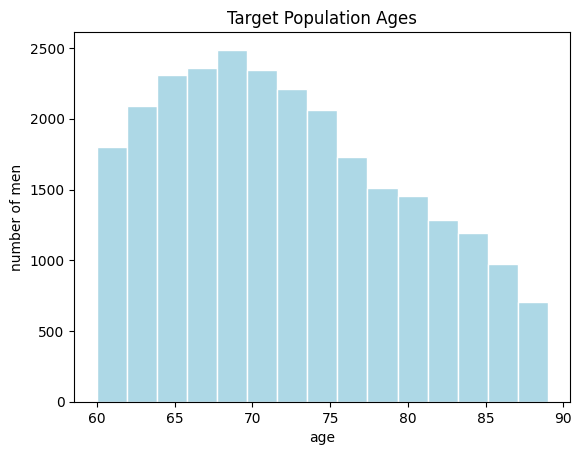

In [71]:
# Target population age distribution
plt.hist(Target_population_df['member_age'],bins = 15, edgecolor = 'white',color='lightblue')
plt.xlabel('age')
plt.ylabel('number of men')
plt.title('Target Population Ages')
#save as png
plt.savefig('target_pop_age_dist.png')
plt.show()

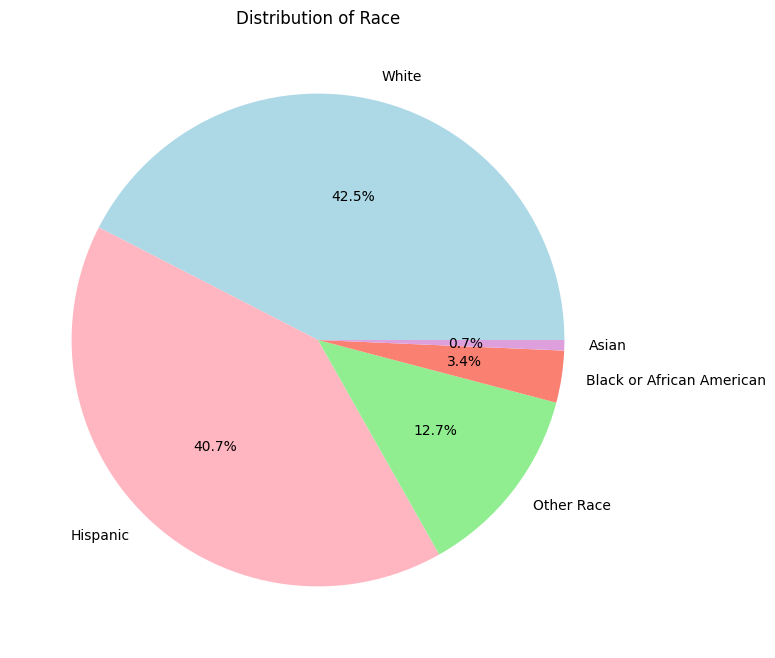

In [72]:
# Distribution of race among the target population
plt.figure(figsize=(8,8))
data = df_final['member_race'].value_counts().head(5)
colors = ['lightblue', 'lightpink', 'lightgreen', 'salmon', 'plum']
plt.pie(data, labels= data.index, autopct= '%1.1f%%',colors=colors)
plt.title('Distribution of Race')
#save as png
plt.savefig('race_dist.png')
plt.show()

<Axes: xlabel='diabetic_status', ylabel='count'>

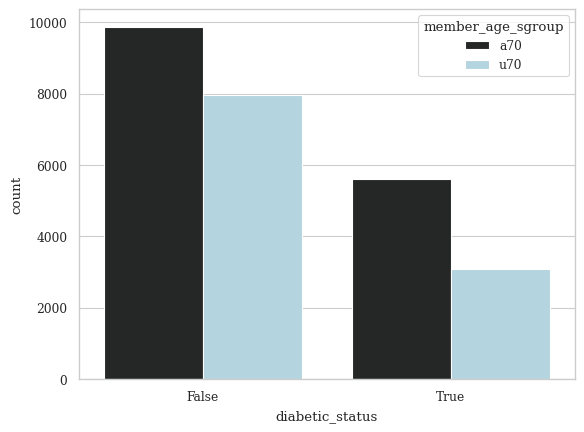

In [ ]:
#Diabetic vs. Non-diabetic count
sns.countplot(data = df_final, x = 'diabetic_status', palette='dark:lightblue', hue='member_age_sgroup')

In [ ]:
#the majority of the target population is above 70 and non-diabetic
#the minority of the target population is under 70 and diabetic

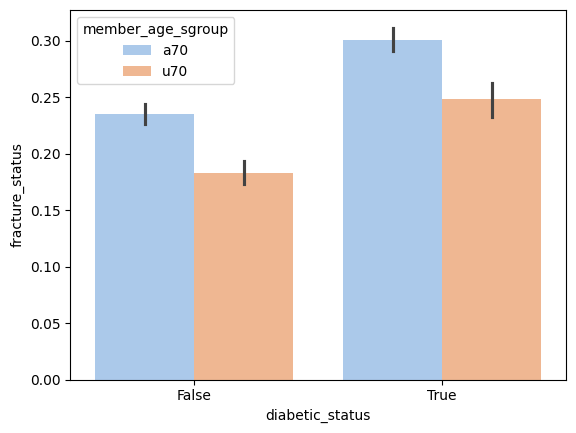

In [73]:
#Diabetic status and fracture status
sns.barplot(data = df_final, x = "diabetic_status" , y = "fracture_status",hue= 'member_age_sgroup',estimator = np.std, palette='pastel')
#save as png
plt.savefig('diabetics_vs_fractures.png')
plt.show()

In [ ]:
#Diabetics above 70 are most likely to suffer fractures
#Non-diabetics under 70 are least likely to suffer fractures

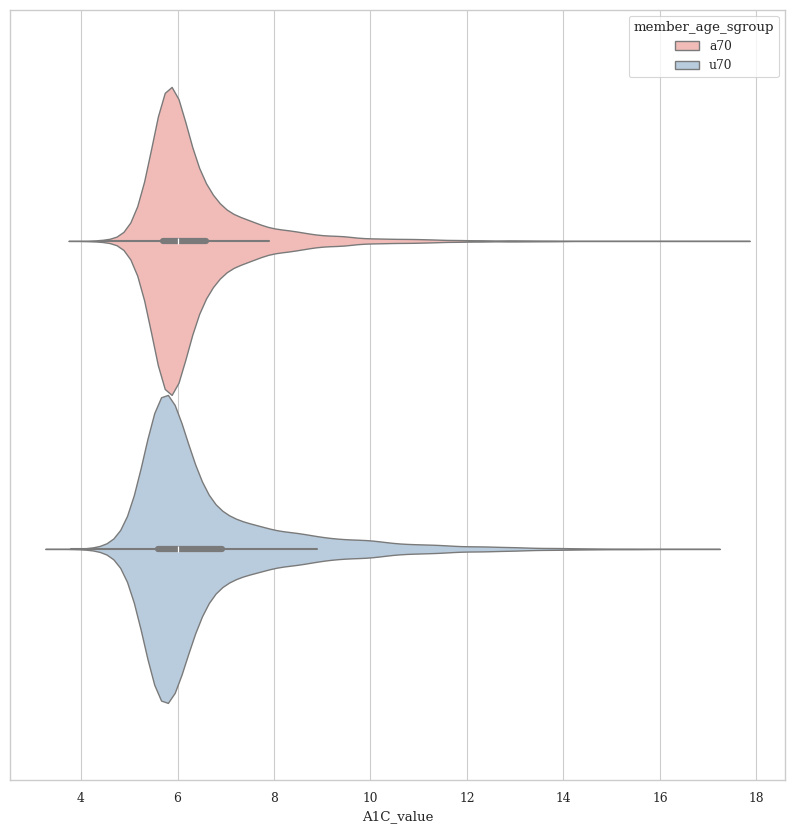

In [74]:
#A1C values across target population
sns.set_theme(context = 'paper',style='whitegrid',palette='Pastel1',font='serif')
plt.figure(figsize=(10, 10))
sns.violinplot(data=df_final,x='A1C_value',hue='member_age_sgroup')
#save as png
plt.savefig('A1C_violinplot.png')
plt.show()

In [ ]:
#the average A1C value among the target population falls between the 5.0 and 7.5 values
#a healthy A1C value is below 5.7%
#a level of 5.7% to 6.4% indicates prediabetes
#a level of 6.5% or more indicates diabetes
#source: https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html#:~:text=Your%20A1C%20Result&text=A%20normal%20A1C%20level%20is,for%20developing%20type%202%20diabetes.

#The A1C value distribution is consistent with the distribution of diabetic v. non-diabetics within the target population
#the majority of members have healthy to pre-diabetic A1C values
#the minority of members have diabetic A1C values

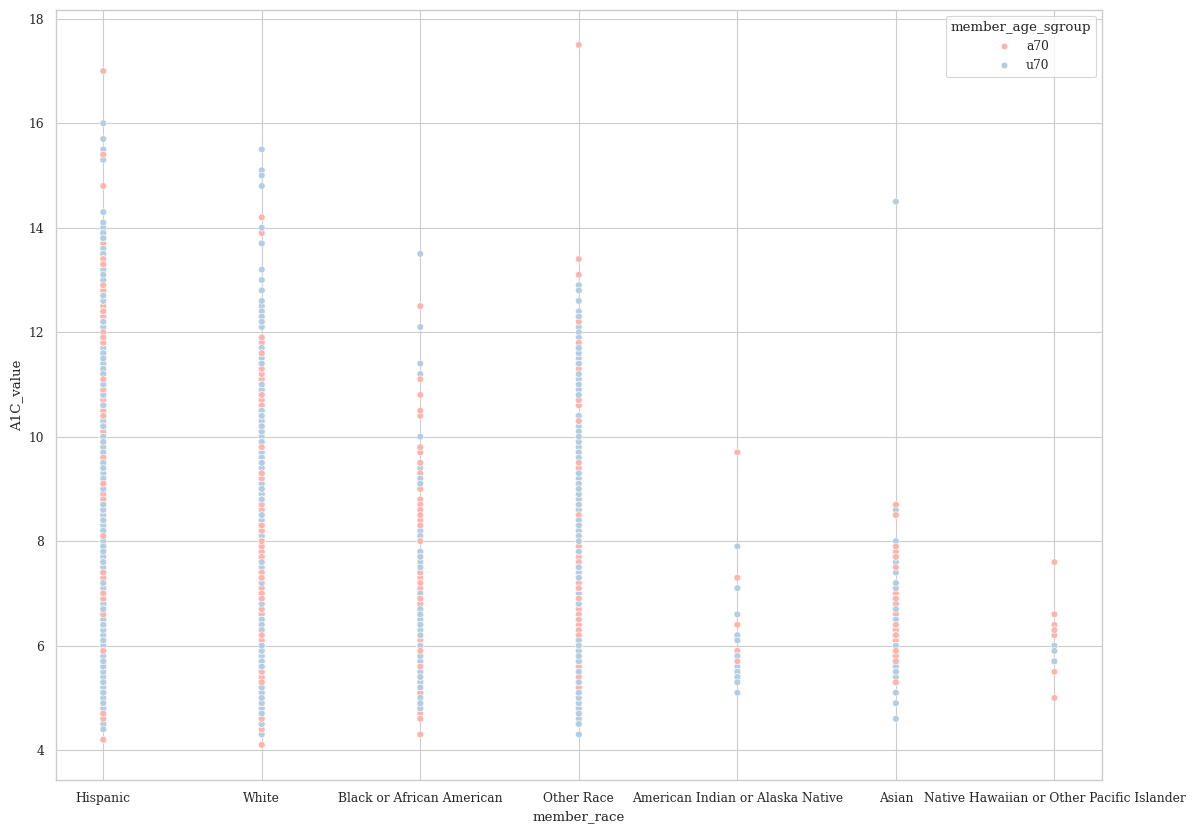

In [ ]:
#A1C values across race and age group
plt.figure(figsize=(13.5, 10))
sns.scatterplot(x='member_race',y='A1C_value',data = df_final, hue='member_age_sgroup')
plt.show()

In [ ]:
#Creating s groups for advanced data visualization
df_u70 = df_final[df_final['member_age_sgroup'] == 'u70']
df_a70 = df_final[df_final['member_age_sgroup'] == 'a70']

In [ ]:
data = df_u70[['calcium_val','member_age']].corr()
data

,calcium_val,member_age
calcium_val,1.000000,-0.038667
member_age,-0.038667,1.000000


In [ ]:
data_2 = df_a70[['calcium_val','member_age']].corr()
data_2

,calcium_val,member_age
calcium_val,1.000000,-0.103485
member_age,-0.103485,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

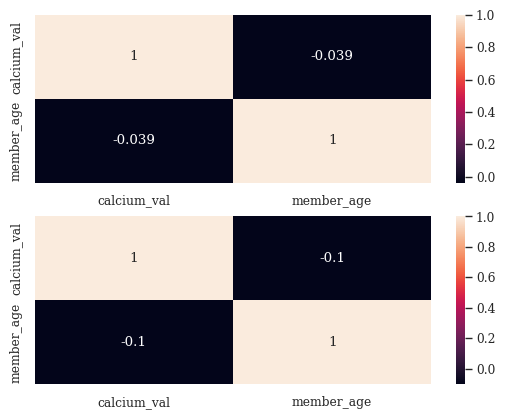

In [ ]:
fig, axes = plt.subplots(2,1)
sns.heatmap(data, ax=axes[0],annot=True)
sns.heatmap(data_2, ax=axes[1],annot=True)

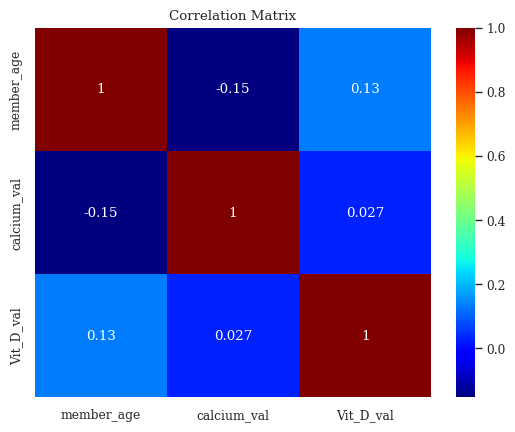

In [77]:
cols = ['member_age','calcium_val','Vit_D_val']
df_map = df_final[cols].corr()
sns.heatmap(df_map,cmap='jet',annot=True,cbar=True)
plt.title('Correlation Matrix')
#save as png
plt.savefig('corr_matrix.png')
plt.show()

In [ ]:
# as members age increases, vit_D increases (probably a supplement)
# as members age increases, calcium_val decreases
# almost no correlation between vit_D and calcium_val

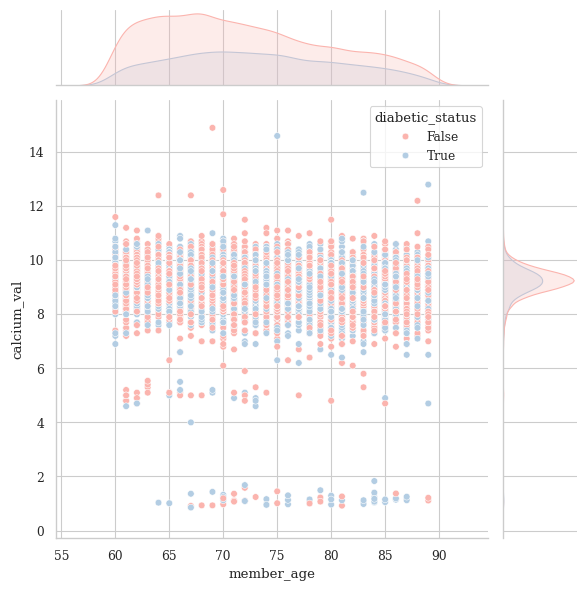

In [80]:
#Finding a correlation between age, calcium value, and diabetic status
sns.jointplot(x='member_age',y='calcium_val',data = df_final, hue='diabetic_status')

#save as png
plt.savefig('agecalc_diabetes.png')
plt.show()

In [ ]:
#While most calcium values are consistent among diabetics and non-diabetics,
#lower calcium values belong mainly to diabetics between 75-88
#this finding is consistent with the fact that diabetes leads to a "deterioration of calcium and bone metabolism"
#source: https://rdcu.be/dHBpf

In [81]:
diabetic_fractures = df_final[(df_final['diabetic_status'] == True) & (df_final['fracture_status'] == True)]
diabetic_fractures

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status,member_age_sgroup
31,0059D967-0DF6-4445-B5DE-E658E847F90C,70,Hispanic,Hispanic or Latino,yes,True,5.6,NaN,True,9.1,16.5,True,a70
101,01323CDB-B62F-43FA-9E7A-779475579BCD,84,White,Not Hispanic or Latino,no,True,6.0,NaN,True,10.1,27.0,True,a70
118,015A23BF-3626-4D27-B431-9F26219B344E,81,White,Not Hispanic or Latino,no,True,5.9,NaN,False,9.6,15.5,True,a70
205,0241CB59-4BE5-417C-9B02-C6A0B4619DFE,71,Hispanic,Hispanic or Latino,yes,True,6.1,NaN,False,9.9,36.1,True,a70
208,0250E292-0D2E-46F7-8F40-B32C9A839BF4,65,Hispanic,Hispanic or Latino,no,True,10.3,NaN,False,10.2,12.8,True,u70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26326,FE64550F-BF62-46E6-B6DE-452210FA9F85,74,Hispanic,Hispanic or Latino,no,True,7.6,NaN,True,9.4,33.4,True,a70
26387,FECE1097-5CAE-47D0-A794-B8AD2F736BB7,79,Hispanic,Hispanic or Latino,no,True,7.0,NaN,False,8.7,8.0,True,a70
26402,FEF83EC0-F49D-41A0-8848-822A97A39814,64,White,Not Hispanic or Latino,no,True,NaN,388.0,False,NaN,13.0,True,u70
26494,FFE329D0-9BFC-4482-AA4E-1FBA59219F2A,81,NaN,NaN,no,True,5.7,NaN,True,9.5,27.3,True,a70


In [ ]:
#total number of diabetics with fractures = 767

In [82]:
#Finding the prevalance of fractures among diabetics
diabetic_pop = 8682  # Total number of diabetic patients
fracture_cases = 767  # Number of diabetic patients with fractures
prevalence = (fracture_cases / diabetic_pop) * 100
prevalence

8.834369960838515

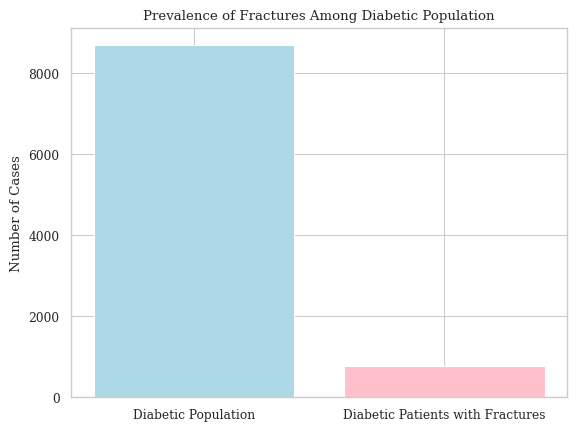

In [84]:
#Distribution of fractures among diabetics

bar_labels = ['Diabetic Population', 'Diabetic Patients with Fractures']
bar_values = [diabetic_pop, fracture_cases]

plt.bar(bar_labels, bar_values, color=['lightblue', 'pink'])

plt.title('Prevalence of Fractures Among Diabetic Population')
plt.ylabel('Number of Cases')
#save as png
plt.savefig('diabetics_fractures.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


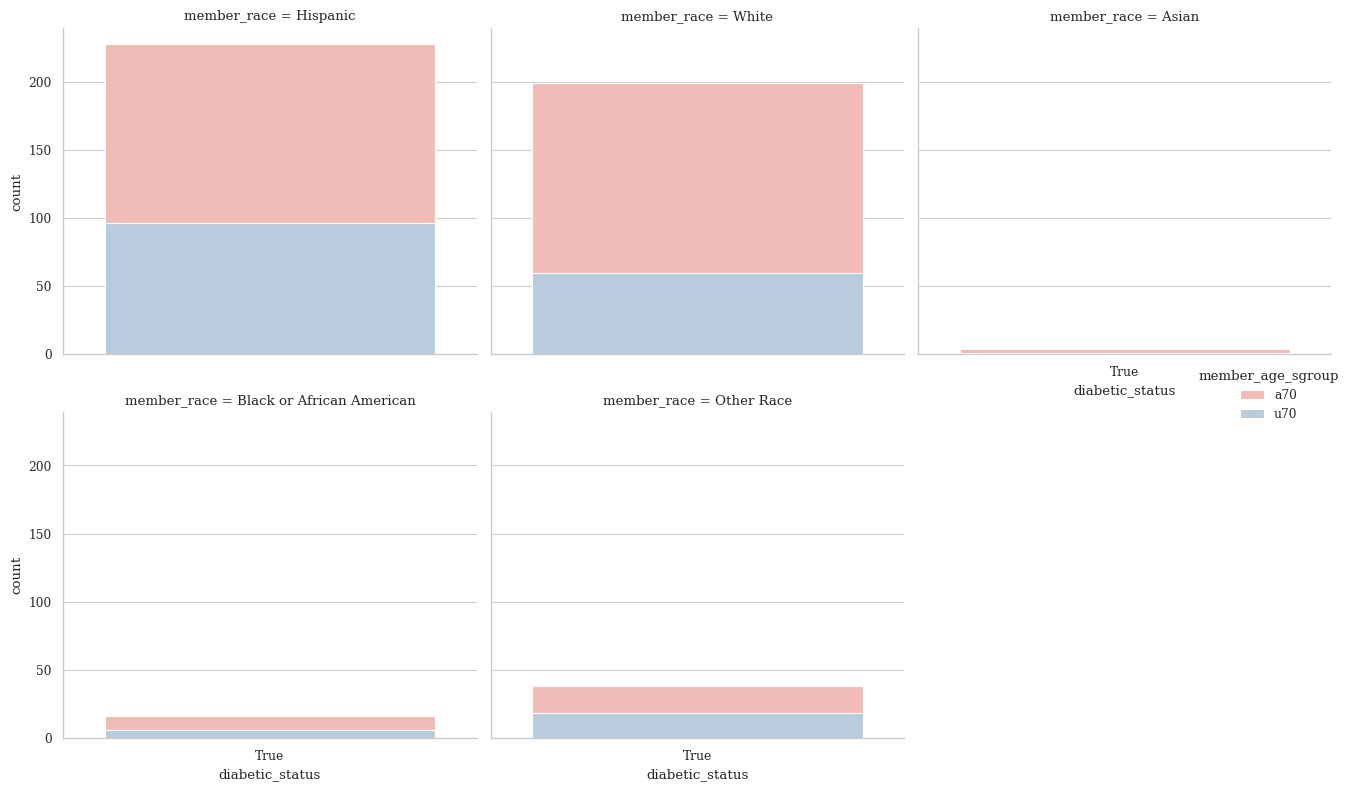

In [ ]:
#The distribution of diabetes across race and age
g = sns.FacetGrid(diabetic_fractures, col='member_race', col_wrap=3, height=4, hue='member_age_sgroup')
g.map(sns.countplot, 'diabetic_status')
g.add_legend()
plt.tight_layout()

In [ ]:
#The majority of diabetics from the target population are Hispanic and White men above 70
#The minority of diabetics are Asian men in both sgroups (a70 and u70)

<Axes: xlabel='testost_val'>

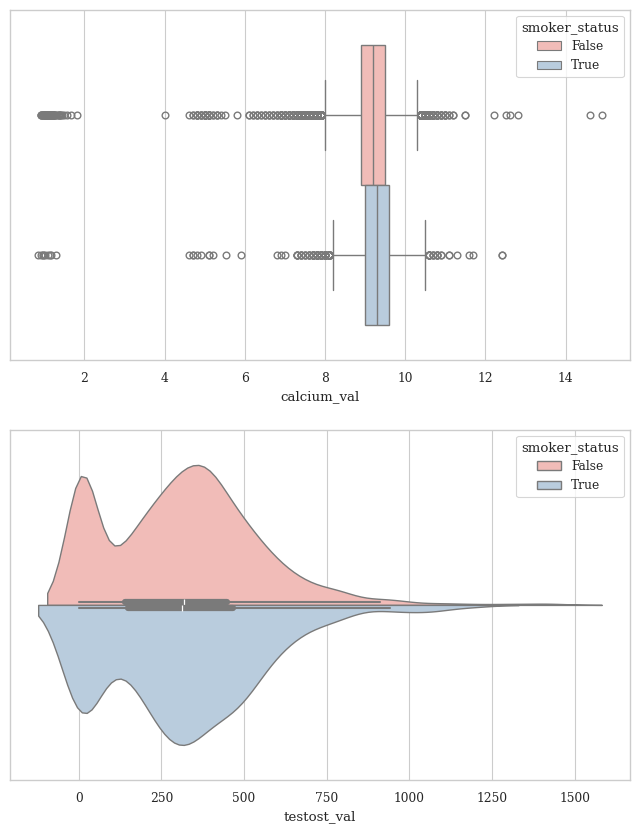

In [ ]:
#Does smoking affect calcium and/or testosterone values?
fig, axes = plt.subplots(2,1,figsize=(8,10))
sns.boxplot(data = df_final, x = 'calcium_val', ax = axes[0],hue='smoker_status')
sns.violinplot(data = df_final,  x = 'testost_val', ax = axes[1],hue='smoker_status',split=True)

In [ ]:
#smoking does not seem to affect calcium or testosterone values
#both smokers and non-smokers have similar values across all ages/demographics

#Predictive Model

**Research Question**: Can we predict the likelihood of a fracture in diabetic men on a scale from 1-5 using vitamin D and calcium levels?

In [ ]:
#load final dataframe
df_final = pd.read_csv('df_final.csv')
df_final

,Unnamed: 0,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status,member_age_sgroup
0,0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,5.7,NaN,False,9.3,53.0,False,a70
1,1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,NaN,NaN,False,9.0,14.4,False,a70
2,2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,8.2,546.0,True,9.7,NaN,False,u70
3,3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,5.6,NaN,False,9.4,39.7,False,a70
4,4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,6.8,NaN,False,7.2,13.3,False,a70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Other Race,Refused to Report,no,False,NaN,NaN,False,NaN,NaN,False,a70
26506,26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,5.5,NaN,False,8.7,11.1,False,a70
26507,26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Other Race,Declined to Specify,no,False,NaN,NaN,False,NaN,NaN,False,u70
26508,26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,NaN,NaN,False,9.9,NaN,False,u70


In [ ]:
df_final.describe()

,Unnamed: 0,member_age,A1C_value,testost_val,calcium_val,Vit_D_val
count,26510.000000,26510.000000,18069.000000,3521.000000,22471.000000,18171.000000
mean,13254.500000,72.258770,6.458836,315.277237,9.176473,28.207523
std,7652.922154,7.781948,1.350036,232.299487,0.696694,12.428502
min,0.000000,60.000000,3.800000,0.000000,0.850000,4.000000
25%,6627.250000,66.000000,5.700000,142.000000,8.900000,19.700000
50%,13254.500000,71.000000,6.000000,317.000000,9.200000,26.700000
75%,19881.750000,78.000000,6.700000,454.000000,9.500000,34.500000
max,26509.000000,89.000000,17.500000,1487.000000,14.900000,149.000000


In [ ]:
# keep only diabetic patients and drop any rows missing our two features
target_df = df_final[df_final['diabetic_status'] == True].copy()
target_dfdf = df_final.dropna(subset=['Vit_D_val', 'calcium_val'])

print(target_df[['Vit_D_val', 'calcium_val', 'fracture_status']].describe())


         Vit_D_val  calcium_val
count  7478.000000  8524.000000
mean     27.724726     9.147740
std      12.128885     0.791192
min       4.000000     0.850000
25%      19.100000     8.900000
50%      26.300000     9.200000
75%      34.100000     9.500000
max     119.000000    14.600000


In [ ]:
#Define features & binary target
X = target_df[['Vit_D_val', 'calcium_val']]
y = target_df['fracture_status'].astype(int)   # False = 0, True =1

# Train/Test split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Fit a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate on the hold‐out set
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rf.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Map predicted probability → 1–5 risk score
#    Scale: 1 + 4 * P(fracture)
y_proba = rf.predict_proba(X_test)[:, 1]
risk_score = (1 + 4 * y_proba).round().astype(int).clip(1,5)

results = pd.DataFrame({
    'Vit_D_val': X_test['Vit_D_val'],
    'calcium_val': X_test['calcium_val'],
    'fracture_true': y_test.values,
    'fracture_proba': y_proba,
    'risk_score_1_5': risk_score
})
print(results.head(10))

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1584
           1       0.09      0.03      0.05       153

    accuracy                           0.89      1737
   macro avg       0.50      0.50      0.49      1737
weighted avg       0.84      0.89      0.86      1737

Confusion matrix:
 [[1533   51]
 [ 148    5]]
       Vit_D_val  calcium_val  fracture_true  fracture_proba  risk_score_1_5
22863       16.5          9.4              0        0.000000               1
17952       21.6          9.8              0        0.028071               1
23033        9.3          9.2              0        0.000000               1
25906       31.5          8.6              0        0.030000               1
6793         NaN          9.0              0        0.091722               1
4350         NaN          9.5              0        0.038029               1
6064        27.2          9.5              0        0.041667    

In [ ]:
print(results.describe())

         Vit_D_val  calcium_val  fracture_true  fracture_proba  risk_score_1_5
count  1497.000000  1718.000000    1737.000000     1737.000000     1737.000000
mean     27.398998     9.134051       0.088083        0.083210        1.268279
std      11.910192     0.832877       0.283497        0.146784        0.633630
min       4.300000     0.950000       0.000000        0.000000        1.000000
25%      19.100000     8.900000       0.000000        0.000000        1.000000
50%      26.200000     9.200000       0.000000        0.020000        1.000000
75%      33.800000     9.500000       0.000000        0.091722        1.000000
max     103.000000    10.800000       1.000000        0.850000        4.000000


In [ ]:
print(results)

       Vit_D_val  calcium_val  fracture_true  fracture_proba  risk_score_1_5
22863       16.5          9.4              0        0.000000               1
17952       21.6          9.8              0        0.028071               1
23033        9.3          9.2              0        0.000000               1
25906       31.5          8.6              0        0.030000               1
6793         NaN          9.0              0        0.091722               1
...          ...          ...            ...             ...             ...
4204        18.2          9.6              0        0.000000               1
12319       14.4          9.3              0        0.010000               1
25557       18.1          9.4              0        0.010000               1
3228        26.4          9.4              0        0.000000               1
16610       20.8          9.9              0        0.132500               2

[1737 rows x 5 columns]


In [ ]:
type(results)

pandas.core.frame.DataFrame

In [ ]:
results['risk_score_1_5'].value_counts()

,count
risk_score_1_5,
1,1420
2,197
3,91
4,29


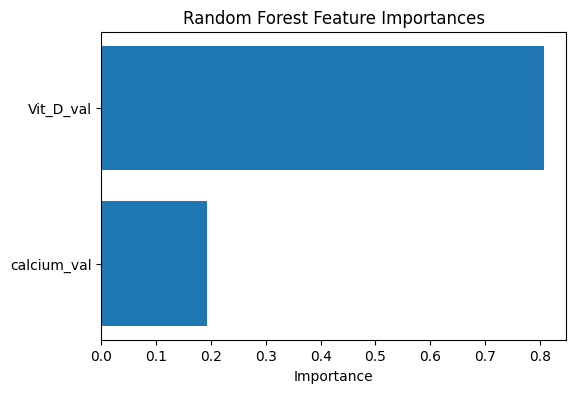

In [ ]:
# Visualize feature importances
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
feat_names = X.columns
order = np.argsort(importances)

plt.figure(figsize=(6,4))
plt.barh(feat_names[order], importances[order])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importances")
plt.show()

##Results

The Random Forest model achieved high overall accuracy (89%) by reliably identifying non-fracture cases (precision 0.91, recall 0.97, F₁ 0.94), but it struggled to detect actual fractures (precision 0.09, recall 0.03, F₁ 0.05), correctly flagging only 5 of 153 fracture events. The confusion matrix shows 1,533 true negatives versus 51 false positives, and 148 false negatives versus just 5 true positives, underscoring a pronounced class-imbalance bias. When translating predicted fracture probabilities into a 1–5 risk score, nearly all test subjects receive a score of 1 (very low risk), with only occasional cases scoring as high as 3. These results suggest that, while vitamin D and calcium levels are informative for ruling out fractures, additional features or imbalance-mitigation techniques (e.g., oversampling, alternative thresholds) will be necessary to improve sensitivity and more accurately stratify high-risk patients.

#Predictive Model 2

To better the model, I added more features to the predictive model: A1c level, testosterone value, smoker status, and on insulin or not

In [85]:
targetdf2 = df_final[df_final['diabetic_status'] == True].copy()

# Select features + target, drop rows missing any of these
feature_cols = [
    'Vit_D_val',
    'calcium_val',
    'A1C_value',
    'on_insulins',
    'testost_val',
    'smoker_status'
]
targetdf2 = df_final.dropna(subset=feature_cols + ['fracture_status'])

X = targetdf2[feature_cols].copy()
y = targetdf2['fracture_status'].astype(int)

# Convert binary string columns to 0/1
X['on_insulins'] = X['on_insulins'].map({'yes': 1, 'no': 0})
X['smoker_status'] = X['smoker_status'].map({'yes': 1, 'no': 0})

#Add clinically meaningful engineered features:
#Ratio of calcium to vitamin D
X['ca_to_vitd_ratio'] = X['calcium_val'] / X['Vit_D_val']

# 5. Scale numeric columns
num_cols = ['Vit_D_val', 'calcium_val', 'A1C_value', 'testost_val',
            'ca_to_vitd_ratio']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# split data into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# Train the Random Forest with class balancing
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

# evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rf.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94       453
           1       0.00      0.00      0.00        53

    accuracy                           0.89       506
   macro avg       0.45      0.50      0.47       506
weighted avg       0.80      0.89      0.84       506

Confusion matrix:
 [[452   1]
 [ 53   0]]


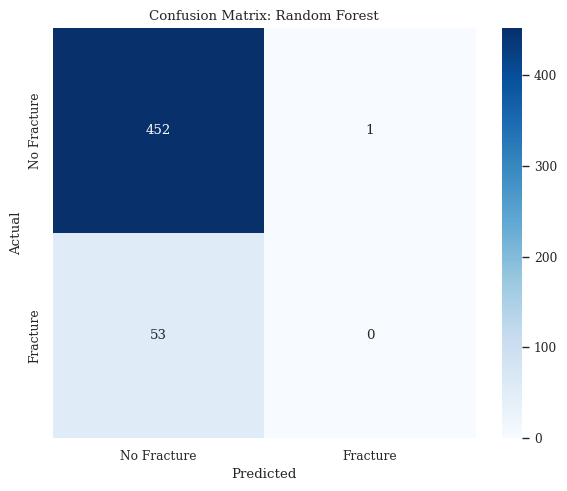

In [90]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["No Fracture", "Fracture"]

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# Save as PNG
plt.savefig("RF_confusion_matrix.png", dpi=300)
plt.show()

In [ ]:
print(results.describe())

         Vit_D_val  calcium_val  fracture_true  fracture_proba  risk_score_1_5
count  1497.000000  1718.000000    1737.000000     1737.000000     1737.000000
mean     27.398998     9.134051       0.088083        0.083210        1.268279
std      11.910192     0.832877       0.283497        0.146784        0.633630
min       4.300000     0.950000       0.000000        0.000000        1.000000
25%      19.100000     8.900000       0.000000        0.000000        1.000000
50%      26.200000     9.200000       0.000000        0.020000        1.000000
75%      33.800000     9.500000       0.000000        0.091722        1.000000
max     103.000000    10.800000       1.000000        0.850000        4.000000


In [ ]:
results['risk_score_1_5'].value_counts()

,count
risk_score_1_5,
1,1420
2,197
3,91
4,29


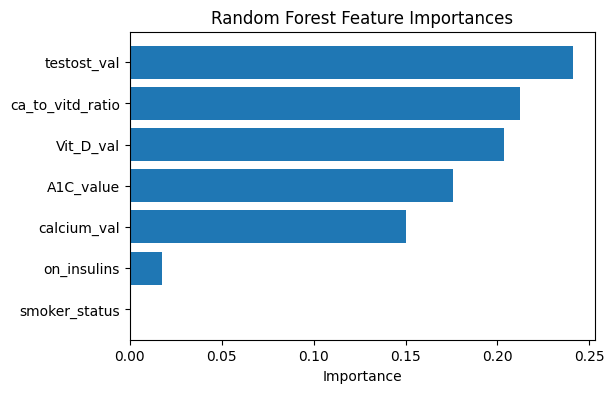

In [ ]:
# Visualize feature importances
importances = rf.feature_importances_
feat_names = X.columns
order = np.argsort(importances)

plt.figure(figsize=(6,4))
plt.barh(feat_names[order], importances[order])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importances")
plt.show()

##Results

The updated Random Forest model again achieves high overall accuracy (89%), driven by its near-perfect identification of non-fracture cases (precision 0.90, recall 1.00, F₁ 0.94). However, it completely fails to detect actual fractures (precision 0.00, recall 0.00, F₁ 0.00), missing all 53 true fracture events. The confusion matrix (452 true negatives, 1 false positive; 53 false negatives, 0 true positives) underscores that no fracture cases were flagged. In practical terms, every patient was classified as “low risk” despite some having fractures, indicating that—even with added features and class weighting—the model’s sensitivity remains at zero. This highlights the need for further adjustments (e.g., more discriminative features, stronger imbalance handling, or alternate modeling approaches) to meaningfully identify high-risk patients.

- try a different model
- add all the limitations
- future work and suggestions
- section for conclusion and discussion

#Predictive Model 3

In [ ]:
#open dataframe
df_final = pd.read_csv('df_final.csv')
df_final

,Unnamed: 0,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status,member_age_sgroup
0,0,00045474-BAB3-4928-BF89-6072DBFB347C,75,NaN,NaN,no,False,5.7,NaN,False,9.3,53.0,False,a70
1,1,000488B9-0652-4E98-80CF-D80546D04C5A,78,Hispanic,Hispanic or Latino,no,True,NaN,NaN,False,9.0,14.4,False,a70
2,2,000D68C5-BF59-4C55-B29D-194F7A5CC95E,60,NaN,NaN,no,True,8.2,546.0,True,9.7,NaN,False,u70
3,3,000F558C-8A82-4835-9430-FC7B2828F3A2,88,Hispanic,Hispanic or Latino,no,False,5.6,NaN,False,9.4,39.7,False,a70
4,4,00101DC8-044B-4C11-BBF5-C7265AD26985,82,NaN,NaN,no,True,6.8,NaN,False,7.2,13.3,False,a70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,26505,FFF99710-52C4-4D04-998B-2054CCAE968D,73,Other Race,Refused to Report,no,False,NaN,NaN,False,NaN,NaN,False,a70
26506,26506,FFFB517A-CE8F-47FC-B329-B3D92CAB561D,75,Hispanic,Hispanic or Latino,no,False,5.5,NaN,False,8.7,11.1,False,a70
26507,26507,FFFDD862-887B-4109-9841-7BC77ED0E164,64,Other Race,Declined to Specify,no,False,NaN,NaN,False,NaN,NaN,False,u70
26508,26508,FFFDF406-C32C-4694-A1F9-20CC2BE3411F,62,NaN,NaN,no,False,NaN,NaN,False,9.9,NaN,False,u70


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
features = ['Vit_D_val', 'calcium_val', 'A1C_value', 'testost_val', 'smoker_status', 'on_insulins']
df_model = df_final[features + ['fracture_status']].copy()

# Drop rows with missing values in any predictor column
df_model = df_model.dropna(subset=features)

# Ensure target is binary (0 and 1)
df_model['fracture_status'] = df_model['fracture_status'].astype(int)

# One-hot encode categorical variables
df_model = pd.get_dummies(df_model, columns=['smoker_status', 'on_insulins'], drop_first=True)

In [ ]:
X = df_model.drop('fracture_status', axis=1)
y = df_model['fracture_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #70/30 split

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[455   0]
 [ 51   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       455
           1       0.00      0.00      0.00        51

    accuracy                           0.90       506
   macro avg       0.45      0.50      0.47       506
weighted avg       0.81      0.90      0.85       506


Accuracy Score: 0.8992094861660079


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Predict and generate confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[455,   0],
       [ 51,   0]])

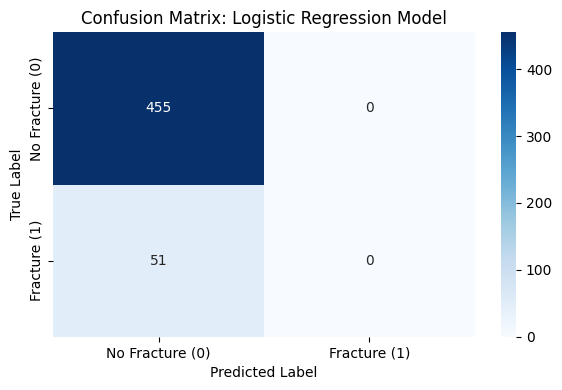

In [ ]:
labels = ['No Fracture (0)', 'Fracture (1)']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix: Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

#save as png
plt.savefig('LR_confusion_matrix.png')
plt.show()

## Results

The logistic regression model achieved a high overall accuracy of 90%, but it failed to predict any positive fracture cases. While it correctly identified all 455 individuals who did not experience a fracture (class 0), it predicted zero cases of those who did (class 1), resulting in a recall and precision of 0.00 for the fracture group. This indicates that the model is heavily biased toward the majority class and does not generalize well for detecting fractures. Despite strong accuracy, the performance is misleading due to severe class imbalance, and the model currently lacks any predictive value for the outcome of interest.

**Compared to Random Forest:**
Both the logistic regression and random forest models achieve high overall accuracy (90% and 89%, respectively), but neither model succeeds in identifying patients who actually experienced fractures. The logistic regression model correctly classified all non-fracture cases but missed all 51 true fracture cases, resulting in a recall and precision of 0.00 for that class—identical to the performance of the random forest model. Despite different modeling approaches, both outputs show that the classifiers are heavily biased toward the majority class and fail to detect minority (fracture) cases. These results emphasize that accuracy alone is misleading in imbalanced datasets and highlight the need for stronger imbalance-handling techniques or additional predictive features to improve fracture detection.